In [1]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\Yanwho\OneDrive\Documents\python-api-challenge")

In [3]:
from config import api_key

In [4]:
# create list of random latitudes evenly distributed across globe

lat = np.random.uniform(low=-90.000, high=90.000, size=2000)

In [5]:
# create list of random longitudes evenly distributed across globe

long = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [6]:
# combine lat and long

latlong = zip(lat, long)

In [7]:
# create list of latitude and longitude combinations 

coordinates=list(latlong)

In [8]:
# create empty lists to be populated in loops

cities=[]

city_name=[]
city_id=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]

In [9]:
# populate cities list

for x in coordinates:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)
  

In [10]:
# create vairable for base url to be used when making api calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# city = []



In [11]:
# loop through city names and create unique api calls for each city
# populate lists for desired fields from returned json
# skip cities that so not result in a successful api call

for city in cities:

    query_url = url + "&appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()

    try:
        city_name.append(weather_response["name"])
        city_id.append(weather_response["id"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        print(city, "success")
    except:
        print(city, "CITY NOT FOUND!")
    pass


severo-kurilsk success
dikson success
rikitea success
quanzhou success
kabare success
bengkulu success
kodiak success
wajir success
korla success
katsuura success
east london success
vaitupu CITY NOT FOUND!
hay river success
magrath success
albany success
college success
utiroa CITY NOT FOUND!
camacha success
busselton success
taolanaro CITY NOT FOUND!
kysyl-syr success
saskylakh success
mount gambier success
esperance success
puerto ayora success
manoharpur success
belushya guba CITY NOT FOUND!
porto franco success
genhe success
ambositra success
amahai success
oranjestad success
avarua success
kapaa success
verrettes success
ushuaia success
sayalgudi CITY NOT FOUND!
walvis bay success
victoria success
punta arenas success
shuiji success
buraydah success
barrow success
barentsburg CITY NOT FOUND!
saint-philippe success
lompoc success
sorland success
stuttgart success
saint anthony success
mataura success
fukue success
hinton success
souillac success
phan thiet success
cidreira success

In [12]:
# create pandas dataframe from lists populated by series of api calls

results_df=pd.DataFrame({"City":pd.Series(city_name), 
                         "ID":pd.Series(city_id),
                         "Latitude":pd.Series(latitude), 
                         "Longitude":pd.Series(longitude), 
                         "Max Temp":pd.Series(max_temp), 
                         "Humidity":pd.Series(humidity), 
                         "Wind Speed":pd.Series(wind_speed),
                         "Cloudiness":pd.Series(cloudiness)
                        })

results_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Severo-Kuril'sk,2121385,50.6789,156.1250,18.72,89,7.54,90
1,Dikson,1507390,73.5069,80.5464,-8.72,90,7.90,100
2,Rikitea,4030556,-23.1203,-134.9692,77.79,79,17.96,5
3,Quanzhou,1797353,24.9139,118.5858,39.20,75,2.24,0
4,Kabare,215605,-2.4683,28.8242,60.44,82,1.28,100
...,...,...,...,...,...,...,...,...
721,Oktyabr'skiy,515879,54.4815,53.4710,-9.38,89,2.91,95
722,Thinadhoo,1337610,0.5333,72.9333,82.09,76,19.77,59
723,Meihekou,2035801,42.5272,125.6753,14.29,97,4.85,100
724,Vanimo,2084442,-2.6741,141.3028,83.50,73,3.94,97


In [13]:
# export dataframe to a csv file

results_df.to_csv("results.csv")

PermissionError: [Errno 13] Permission denied: 'results.csv'

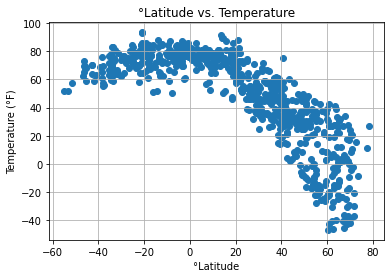

In [31]:
plt.scatter(results_df["Latitude"], results_df["Max Temp"])
plt.title("°Latitude vs. Temperature")
plt.ylabel("Temperature (°F)")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/max_temp.png")

In [ ]:
plt.savefig

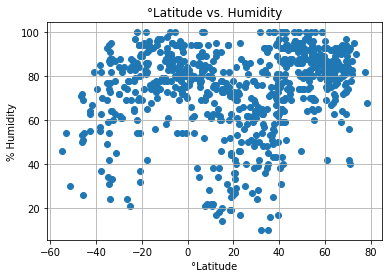

In [30]:
plt.scatter(results_df["Latitude"], results_df["Humidity"])
plt.title("°Latitude vs. Humidity")
plt.ylabel("% Humidity")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/humidity.png")

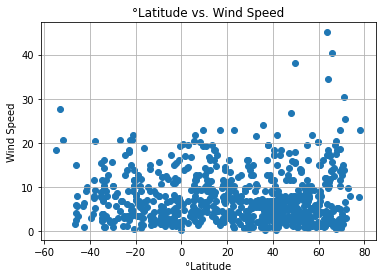

In [29]:
plt.scatter(results_df["Latitude"], results_df["Wind Speed"])
plt.title("°Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/wind_speed.png")

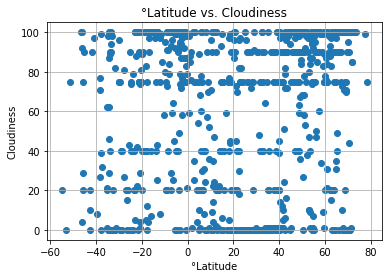

In [28]:
plt.scatter(results_df["Latitude"], results_df["Cloudiness"])
plt.title("°Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/cloudiness.png")